# Asian and Indian Cuisines

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
!ls


Asian and Indian Cuisines.ipynb cleaned_cuisines.csv
asian_indian_recipes.csv


In [3]:
path = "asian_indian_recipes.csv"
cuisines = pd.read_csv(path)
cuisines.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
cuisines.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
cuisines.drop(["a"], axis=1)

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2445,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
cuisines.cuisine.value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

In [6]:
cuisines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, a to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


In [7]:
cuisines.isnull().sum().sort_values(ascending=False)

a                  0
liver              0
popcorn            0
plum               0
pistachio          0
                  ..
enokidake          0
endive             0
emmental_cheese    0
elderberry         0
zucchini           0
Length: 385, dtype: int64

# Data Analysis

<AxesSubplot:>

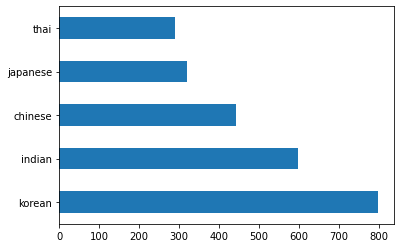

In [8]:
cuisines.cuisine.value_counts().plot.barh()

In [9]:
thai_df = cuisines[(cuisines.cuisine == "thai")]
japanese_df = cuisines[(cuisines.cuisine == "japanese")]
chinese_df = cuisines[(cuisines.cuisine == "chinese")]
indian_df = cuisines[(cuisines.cuisine == "indian")]
korean_df = cuisines[(cuisines.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


In [10]:
def create_ingredient_df(df):
    ingredient_df = cuisines.T.drop(['cuisine']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    return ingredient_df

<AxesSubplot:>

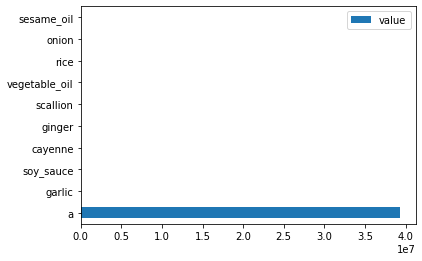

In [11]:
#thai
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

<AxesSubplot:>

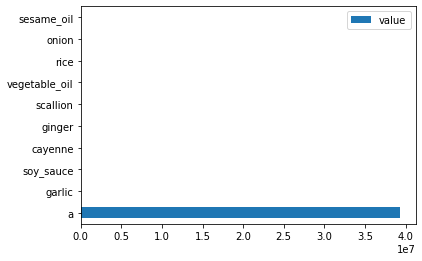

In [12]:
#japanese
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

<AxesSubplot:>

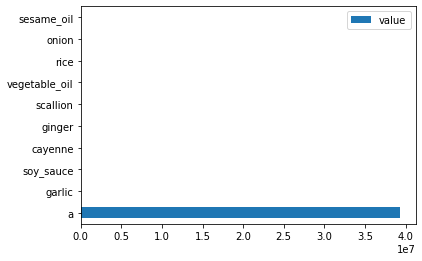

In [13]:
#chinese
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

<AxesSubplot:>

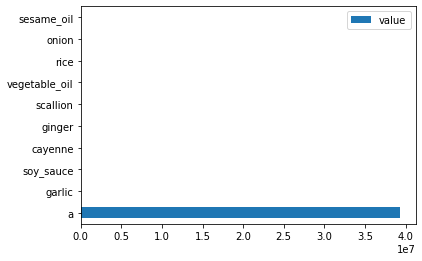

In [14]:
#indian
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

<AxesSubplot:>

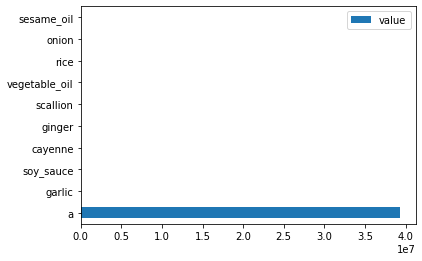

In [15]:
#korean
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

In [16]:
#drop almost unique ingredients across
feature_df= cuisines.drop(['cuisine','rice','garlic','ginger'], axis=1)
labels_df = cuisines.cuisine #.unique()
feature_df.head()

,a,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)


In [18]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {cuisines.cuisine.value_counts()}')

new label count: indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64
old label count: korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


In [19]:
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')


In [20]:
#saving the cleaned data
transformed_df.head()
transformed_df.info()
transformed_df.to_csv("cleaned_cuisines.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 382 entries, cuisine to zucchini
dtypes: int64(381), object(1)
memory usage: 11.6+ MB


# Predict National Cuisine

In [21]:
cuisines_df = pd.read_csv("cleaned_cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,a,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,66,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,67,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,68,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,69,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [23]:
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,a,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)


In [25]:
lr = LogisticRegression(multi_class='ovr',solver='liblinear')
model = lr.fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.6797331109257715


In [26]:
print(f'ingredients: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')

ingredients: Index(['a', 'bean', 'fish', 'shiitake', 'soy_sauce', 'soybean', 'wine'], dtype='object')
cuisine: japanese


In [27]:
test= X_test.iloc[50].values.reshape(-1, 1).T
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

topPrediction = resultdf.T.sort_values(by=[0], ascending = [False])
topPrediction.head()

,0
japanese,0.280757
korean,0.275793
chinese,0.269023
thai,0.087235
indian,0.087191


In [28]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

     chinese       0.86      0.41      0.56       249
      indian       0.76      0.80      0.78       245
    japanese       0.50      0.70      0.58       214
      korean       0.67      0.76      0.71       245
        thai       0.74      0.73      0.74       246

    accuracy                           0.68      1199
   macro avg       0.71      0.68      0.67      1199
weighted avg       0.71      0.68      0.68      1199



In [29]:
X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)


In [30]:
C = 10
# Create different classifiers.
classifiers = {
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,random_state=0),
    'KNN classifier': KNeighborsClassifier(C),
    'SVC': SVC(),
    'RFST': RandomForestClassifier(n_estimators=100),
    'ADA': AdaBoostClassifier(n_estimators=100)

}


In [ ]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))